In [3]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

In [75]:
# NOTE: you will need to tinker with the meta-parameters below yourself (do not think of them as defaults by any means)
# meta-parameters for program
trial_name = 'p1_fit' # will add a unique sub-string to output of this program
degree = 15 # p, order of model
beta = 0 # regularization coefficient
alpha = 1.67 # step size coefficient
eps = 0.000001 # controls convergence criterion
n_epoch = 10000 # number of epochs (full passes through the dataset)

path = os.getcwd() + '/data/prob2.dat'  
data = pd.read_csv(path, header=None, names=['X', 'Y']) 

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

# convert from data frames to numpy matrices
X = np.array(X.values)
y = np.array(y.values)

# apply feature map to input features x1
# WRITEME: write code to turn X_feat into a polynomial feature map (hint: you could use a loop and array concatenation)
X_feat = np.ones((X.shape[0], 1))
for j in range(1,degree+1):
    X_feat = np.concatenate((X_feat, X**j), axis = 1)
X_feat;

## Matrix multiplication in Numpy

(1) The standard * is the entrywise product. <br>
(2) To perform matrix multiplication, use np.dot( , )

In [26]:
A = np.array([[1,2],[3,4]])
B = np.array([[3,4],[5,6]])
np.dot(A,B)

array([[13, 16],
       [29, 36]])

--------------------------

In [27]:
def computeCost(X_feat, y, theta, beta): # loss is now Bernoulli cross-entropy/log likelihood
    # WRITEME: write your code here to complete the routine
    m = X_feat.shape[0]
    THETA = np.concatenate((theta[0].reshape(1,1),(theta[1].T)),axis = 0)
    Cost = (1/(2*m))*((np.dot(X_feat,THETA)-y)**2).sum() + (beta/(2*m))*(theta[1]**2).sum()
    return Cost

In [40]:
def computeGrad(X_feat, y, theta, beta):
    # WRITEME: write your code here to complete the routine (
    # NOTE: you do not have to use the partial derivative symbols below, they are there to guide your thinking)
    m = X_feat.shape[0]
    n = X_feat.shape[1]
    THETA = np.concatenate((theta[0].reshape(1,1),(theta[1].T)),axis = 0)
    y_THETA = np.dot(X_feat,THETA) ## the predictions by theta
    dL_db = (1/m)*(y_THETA-y).sum() # derivative w.r.t. model bias b
    dL_dw = np.array([1/m*((y_THETA-y)*(X_feat[:,j].reshape(m,1))).sum() + (beta/m)*theta[1][0,j-1] for j in range(1,n)]) # derivative w.r.t model weights w
    nabla = (dL_db, dL_dw) # nabla represents the full gradient
    return nabla

In [29]:
def regress(X_feat, theta):
    THETA = np.concatenate((theta[0].reshape(1,1), theta[1]), axis = 1).T
    return np.dot(X_feat,THETA)

In [ ]:
# convert to numpy arrays and initalize the parameter array theta 
b = np.array([0])
w = np.zeros((1,X_feat.shape[1]-1))
theta = (b, w)

In [106]:
L = computeCost(X_feat, y, theta, beta)
print("-1 L = {0}".format(L))
i = 0

while(i < n_epoch):
    dL_db, dL_dw = computeGrad(X_feat, y, theta, beta)
    b = theta[0]
    w = theta[1]
    # update rules go here...
    # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
    b = b - alpha*dL_db
    w = w - alpha*dL_dw
    theta = (b,w)
    
    #if (L-computeCost(X_feat, y, theta, beta))<eps:
       # break
    
    L = computeCost(X_feat, y, theta, beta)
    
    # WRITEME: write code to perform a check for convergence (or simply to halt early)
    
    print(" {0} L = {1}".format(i,L))
    i += 1
# print parameter values found after the search
print("w = ",w)
print("b = ",b)

-1 L = 0.002835329306236057
 0 L = 0.0028353277723425782
 1 L = 0.002835326238473483
 2 L = 0.0028353247046287687
 3 L = 0.0028353231708084328
 4 L = 0.002835321637012509
 5 L = 0.00283532010324094
 6 L = 0.0028353185694937845
 7 L = 0.0028353170357709604
 8 L = 0.0028353155020725703
 9 L = 0.0028353139683985114
 10 L = 0.0028353124347488875
 11 L = 0.002835310901123628
 12 L = 0.0028353093675227035
 13 L = 0.002835307833946189
 14 L = 0.002835306300394059
 15 L = 0.0028353047668662947
 16 L = 0.002835303233362901
 17 L = 0.0028353016998839188
 18 L = 0.002835300166429293
 19 L = 0.0028352986329990273
 20 L = 0.002835297099593147
 21 L = 0.002835295566211651
 22 L = 0.002835294032854536
 23 L = 0.0028352924995217947
 24 L = 0.0028352909662134043
 25 L = 0.0028352894329293937
 26 L = 0.002835287899669783
 27 L = 0.002835286366434506
 28 L = 0.002835284833223622
 29 L = 0.002835283300037112
 30 L = 0.0028352817668749757
 31 L = 0.002835280233737219
 32 L = 0.0028352787006237982
 33 L = 0

 427 L = 0.0028346750219708696
 428 L = 0.002834673498471254
 429 L = 0.002834671974995838
 430 L = 0.002834670451544605
 431 L = 0.0028346689281175557
 432 L = 0.002834667404714667
 433 L = 0.002834665881335979
 434 L = 0.0028346643579814914
 435 L = 0.0028346628346511693
 436 L = 0.0028346613113450127
 437 L = 0.0028346597880630335
 438 L = 0.0028346582648052635
 439 L = 0.0028346567415716826
 440 L = 0.002834655218362244
 441 L = 0.0028346536951769953
 442 L = 0.002834652172015914
 443 L = 0.0028346506488790405
 444 L = 0.002834649125766335
 445 L = 0.0028346476026778027
 446 L = 0.002834646079613458
 447 L = 0.002834644556573263
 448 L = 0.0028346430335572815
 449 L = 0.002834641510565452
 450 L = 0.002834639987597814
 451 L = 0.0028346384646543215
 452 L = 0.0028346369417350252
 453 L = 0.0028346354188398914
 454 L = 0.0028346338959689514
 455 L = 0.002834632373122144
 456 L = 0.0028346308502995433
 457 L = 0.0028346293275011065
 458 L = 0.0028346278047268175
 459 L = 0.0028346262

 1892 L = 0.002832468788691101
 1893 L = 0.002832467300127982
 1894 L = 0.0028324658115883613
 1895 L = 0.002832464323072232
 1896 L = 0.002832462834579677
 1897 L = 0.0028324613461105565
 1898 L = 0.002832459857664994
 1899 L = 0.0028324583692429257
 1900 L = 0.0028324568808443546
 1901 L = 0.0028324553924693264
 1902 L = 0.002832453904117794
 1903 L = 0.0028324524157897586
 1904 L = 0.0028324509274852343
 1905 L = 0.0028324494392042276
 1906 L = 0.002832447950946718
 1907 L = 0.0028324464627127403
 1908 L = 0.002832444974502227
 1909 L = 0.002832443486315286
 1910 L = 0.002832441998151773
 1911 L = 0.002832440510011811
 1912 L = 0.0028324390218953505
 1913 L = 0.0028324375338023783
 1914 L = 0.002832436045732919
 1915 L = 0.002832434557686973
 1916 L = 0.0028324330696645112
 1917 L = 0.002832431581665556
 1918 L = 0.0028324300936901007
 1919 L = 0.00283242860573816
 1920 L = 0.00283242711780971
 1921 L = 0.002832425629904786
 1922 L = 0.0028324241420233406
 1923 L = 0.002832422654165

 2920 L = 0.002830950876544885
 2921 L = 0.002830949411916002
 2922 L = 0.002830947947310182
 2923 L = 0.0028309464827274648
 2924 L = 0.0028309450181677135
 2925 L = 0.0028309435536310497
 2926 L = 0.0028309420891174503
 2927 L = 0.002830940624626896
 2928 L = 0.002830939160159387
 2929 L = 0.0028309376957149387
 2930 L = 0.0028309362312935273
 2931 L = 0.0028309347668951813
 2932 L = 0.0028309333025198676
 2933 L = 0.0028309318381675814
 2934 L = 0.002830930373838407
 2935 L = 0.002830928909532206
 2936 L = 0.0028309274452490954
 2937 L = 0.0028309259809890363
 2938 L = 0.0028309245167519974
 2939 L = 0.0028309230525380073
 2940 L = 0.0028309215883470878
 2941 L = 0.0028309201241791824
 2942 L = 0.0028309186600343505
 2943 L = 0.002830917195912539
 2944 L = 0.0028309157318137674
 2945 L = 0.0028309142677380404
 2946 L = 0.0028309128036853645
 2947 L = 0.0028309113396557516
 2948 L = 0.00283090987564916
 2949 L = 0.002830908411665589
 2950 L = 0.0028309069477050917
 2951 L = 0.0028309

 4390 L = 0.002828822530316217
 4391 L = 0.002828821099101392
 4392 L = 0.0028288196679089822
 4393 L = 0.0028288182367389838
 4394 L = 0.0028288168055913936
 4395 L = 0.0028288153744662164
 4396 L = 0.002828813943363439
 4397 L = 0.002828812512283091
 4398 L = 0.002828811081225147
 4399 L = 0.0028288096501896
 4400 L = 0.002828808219176496
 4401 L = 0.0028288067881857386
 4402 L = 0.002828805357217417
 4403 L = 0.002828803926271505
 4404 L = 0.002828802495347984
 4405 L = 0.0028288010644468954
 4406 L = 0.002828799633568196
 4407 L = 0.002828798202711899
 4408 L = 0.0028287967718780196
 4409 L = 0.0028287953410665256
 4410 L = 0.0028287939102774476
 4411 L = 0.0028287924795107736
 4412 L = 0.002828791048766483
 4413 L = 0.002828789618044616
 4414 L = 0.0028287881873451347
 4415 L = 0.002828786756668073
 4416 L = 0.002828785326013396
 4417 L = 0.0028287838953811153
 4418 L = 0.0028287824647712486
 4419 L = 0.002828781034183787
 4420 L = 0.0028287796036187054
 4421 L = 0.002828778173076

 5440 L = 0.002827332014690544
 5441 L = 0.0028273306067718783
 5442 L = 0.0028273291988751875
 5443 L = 0.002827327791000458
 5444 L = 0.0028273263831477026
 5445 L = 0.0028273249753169
 5446 L = 0.0028273235675080675
 5447 L = 0.0028273221597212026
 5448 L = 0.002827320751956274
 5449 L = 0.0028273193442133124
 5450 L = 0.0028273179364923136
 5451 L = 0.00282731652879328
 5452 L = 0.00282731512111618
 5453 L = 0.002827313713461091
 5454 L = 0.0028273123058279283
 5455 L = 0.0028273108982167314
 5456 L = 0.002827309490627485
 5457 L = 0.002827308083060204
 5458 L = 0.0028273066755148723
 5459 L = 0.002827305267991503
 5460 L = 0.0028273038604900713
 5461 L = 0.0028273024530106367
 5462 L = 0.002827301045553106
 5463 L = 0.0028272996381175546
 5464 L = 0.002827298230703987
 5465 L = 0.0028272968233123393
 5466 L = 0.0028272954159426463
 5467 L = 0.002827294008594917
 5468 L = 0.0028272926012691234
 5469 L = 0.002827291193965289
 5470 L = 0.0028272897866834326
 5471 L = 0.00282728837942

 6896 L = 0.002825305135070078
 6897 L = 0.002825303758688249
 6898 L = 0.002825302382327755
 6899 L = 0.002825301005988617
 6900 L = 0.0028252996296708253
 6901 L = 0.0028252982533744087
 6902 L = 0.0028252968770993273
 6903 L = 0.0028252955008456196
 6904 L = 0.0028252941246132775
 6905 L = 0.0028252927484022743
 6906 L = 0.0028252913722126463
 6907 L = 0.0028252899960443515
 6908 L = 0.002825288619897423
 6909 L = 0.0028252872437718435
 6910 L = 0.002825285867667595
 6911 L = 0.002825284491584736
 6912 L = 0.0028252831155232178
 6913 L = 0.002825281739483064
 6914 L = 0.0028252803634642334
 6915 L = 0.0028252789874667764
 6916 L = 0.002825277611490682
 6917 L = 0.0028252762355359066
 6918 L = 0.0028252748596024934
 6919 L = 0.0028252734836904385
 6920 L = 0.0028252721077997164
 6921 L = 0.00282527073193037
 6922 L = 0.0028252693560823564
 6923 L = 0.0028252679802556846
 6924 L = 0.0028252666044503725
 6925 L = 0.0028252652286663953
 6926 L = 0.0028252638529037604
 6927 L = 0.0028252

 8119 L = 0.0028236376563978726
 8120 L = 0.0028236363058337125
 8121 L = 0.002823634955290404
 8122 L = 0.002823633604767967
 8123 L = 0.0028236322542664013
 8124 L = 0.0028236309037857096
 8125 L = 0.002823629553325863
 8126 L = 0.0028236282028868903
 8127 L = 0.002823626852468758
 8128 L = 0.002823625502071497
 8129 L = 0.0028236241516950834
 8130 L = 0.002823622801339558
 8131 L = 0.0028236214510048664
 8132 L = 0.0028236201006910377
 8133 L = 0.002823618750398073
 8134 L = 0.002823617400125965
 8135 L = 0.0028236160498747278
 8136 L = 0.0028236146996443493
 8137 L = 0.0028236133494347823
 8138 L = 0.0028236119992461344
 8139 L = 0.0028236106490782953
 8140 L = 0.0028236092989313297
 8141 L = 0.002823607948805231
 8142 L = 0.002823606598699973
 8143 L = 0.002823605248615572
 8144 L = 0.0028236038985520323
 8145 L = 0.002823602548509316
 8146 L = 0.002823601198487461
 8147 L = 0.002823599848486496
 8148 L = 0.0028235984985063647
 8149 L = 0.0028235971485470854
 8150 L = 0.0028235957

 9473 L = 0.0028218279388867507
 9474 L = 0.0028218266162083148
 9475 L = 0.002821825293550217
 9476 L = 0.0028218239709124344
 9477 L = 0.002821822648294992
 9478 L = 0.0028218213256978614
 9479 L = 0.0028218200031210547
 9480 L = 0.0028218186805645975
 9481 L = 0.0028218173580284557
 9482 L = 0.002821816035512627
 9483 L = 0.0028218147130171464
 9484 L = 0.0028218133905419675
 9485 L = 0.002821812068087135
 9486 L = 0.002821810745652622
 9487 L = 0.002821809423238424
 9488 L = 0.0028218081008445687
 9489 L = 0.0028218067784710034
 9490 L = 0.002821805456117771
 9491 L = 0.0028218041337848593
 9492 L = 0.002821802811472302
 9493 L = 0.002821801489180042
 9494 L = 0.0028218001669081134
 9495 L = 0.002821798844656496
 9496 L = 0.0028217975224252055
 9497 L = 0.0028217962002142234
 9498 L = 0.0028217948780235856
 9499 L = 0.0028217935558532484
 9500 L = 0.002821792233703226
 9501 L = 0.0028217909115735304
 9502 L = 0.002821789589464145
 9503 L = 0.002821788267375114
 9504 L = 0.002821786

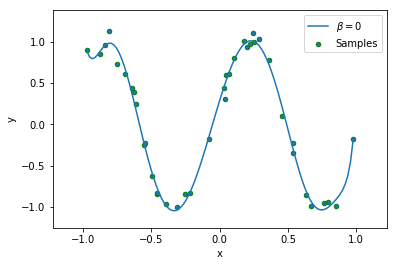

In [107]:
kludge = 0.25
# visualize the fit against the data
X_test = np.linspace(data.X.min(), data.X.max(), 100).reshape(100,1)

# apply feature map to input features x1
# WRITEME: write code to turn X_test into a polynomial feature map (hint: you could use a loop and array concatenation)
X_test_feat = np.ones((X_test.shape[0], 1))
for j in range(1,degree+1):
    X_test_j = np.array([x**j for x in X_test])
    X_test_feat = np.concatenate((X_test_feat, X_test_j), axis = 1)

X_test_feat

plt.plot(X_test, regress(X_test_feat, theta), label = r'$\beta = $'+str(beta))
plt.scatter(X[:,0], y, edgecolor='g', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((np.amin(X_test) - kludge, np.amax(X_test) + kludge))
plt.ylim((np.amin(y) - kludge, np.amax(y) + kludge))
plt.legend(loc="best")
# WRITEME: write your code here to save plot to disk (look up documentation/inter-webs for matplotlib)
plt.savefig('Poly_Reg_d_'+str(degree)+'_beta_'+str(beta)[2:]+'.png', dpi = 400)
plt.show()